# MAE3405: Effect of Altitude on the Fuel-Air Otto Cycle

Dr. Daniel Duke<br>
Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)<br>
Department of Mechanical & Aerospace Engineering<br>
Monash University, Australia

Net work for the fuel-air Otto cycle is given by:
$$
w_n = w_{out} - w_{in} = c_{v,p} ( T_3 - T_4 ) - c_{v,r} ( T_2 - T_1 ) \; [\mathrm{kJ/kg}]
$$

The volumetric power is given by
$$
w_v = w_n \rho_1 \; [\mathrm{kJ/m}^3]
$$

In [1]:
# define constants
AF = 15.1
LHV = 44.5 # MJ/kg_f
Cvp = 1.143 # kJ/kg.K
Cvr = 0.8392 # kJ/kg.K
gamma_p = 1.259
gamma_r = 1.327
r_v = 8.5

print("Constants are set as follows:")
print("A/F ratio \t = %.1f" % AF)
print("fuel LHV \t = %.1f MJ/kg_f" % LHV)
print("C_v \t \t = %.3f kJ/kg.K (reactants), %.3f kJ/kg.K (products)" % (Cvr,Cvp))
print("gamma \t \t = %.3f (reactants), %.3f (products)" % (gamma_r,gamma_p))
print("Compression ratio= %.1f" % r_v)

Constants are set as follows:
A/F ratio 	 = 15.1
fuel LHV 	 = 44.5 MJ/kg_f
C_v 	 	 = 0.839 kJ/kg.K (reactants), 1.143 kJ/kg.K (products)
gamma 	 	 = 1.327 (reactants), 1.259 (products)
Compression ratio= 8.5


In [2]:
# define altitudes and conditions
from  fluids.atmosphere import ATMOSPHERE_1976
import numpy as np
z = np.arange(0,15001.,1.)
p1 = np.zeros_like(z); v1 = np.zeros_like(z); T1 = np.zeros_like(z)
for i in range(len(z)):
    zi = ATMOSPHERE_1976(z[i])
    p1[i] = zi.P/1e3 # kPa
    v1[i] = 1./zi.rho
    T1[i] = zi.T
print("Using 1976 International Standard Atmosphere with altitude range %.0f to %.0f m" % (z.min(),z.max()))

Using 1976 International Standard Atmosphere with altitude range 0 to 15000 m


In [3]:
# calculate fuel-air Otto cycle
print("Using naturally aspirated fuel-air Otto cycle")
p2 = p1*(r_v**gamma_r)
v2 = v1 / r_v
T2 = p2*v2 / ( Cvr*(gamma_r - 1) )

qh = LHV*1e3/(AF+1)
T0 = 298.
T3 = ((qh + Cvr*(T2 - T0))/Cvp) + T0
v3 = v2
p3 = ( Cvp*(gamma_p - 1) ) * T3 / (v3+1e-6)

p4 = p3/(r_v**gamma_p)
v4 = v1
T4 = p4*v4 / ( Cvp*(gamma_p - 1) )

wnet = Cvp*(T3-T4) - Cvr*(T2-T1)
wvol = wnet / v1

Using naturally aspirated fuel-air Otto cycle


<IPython.core.display.Javascript object>


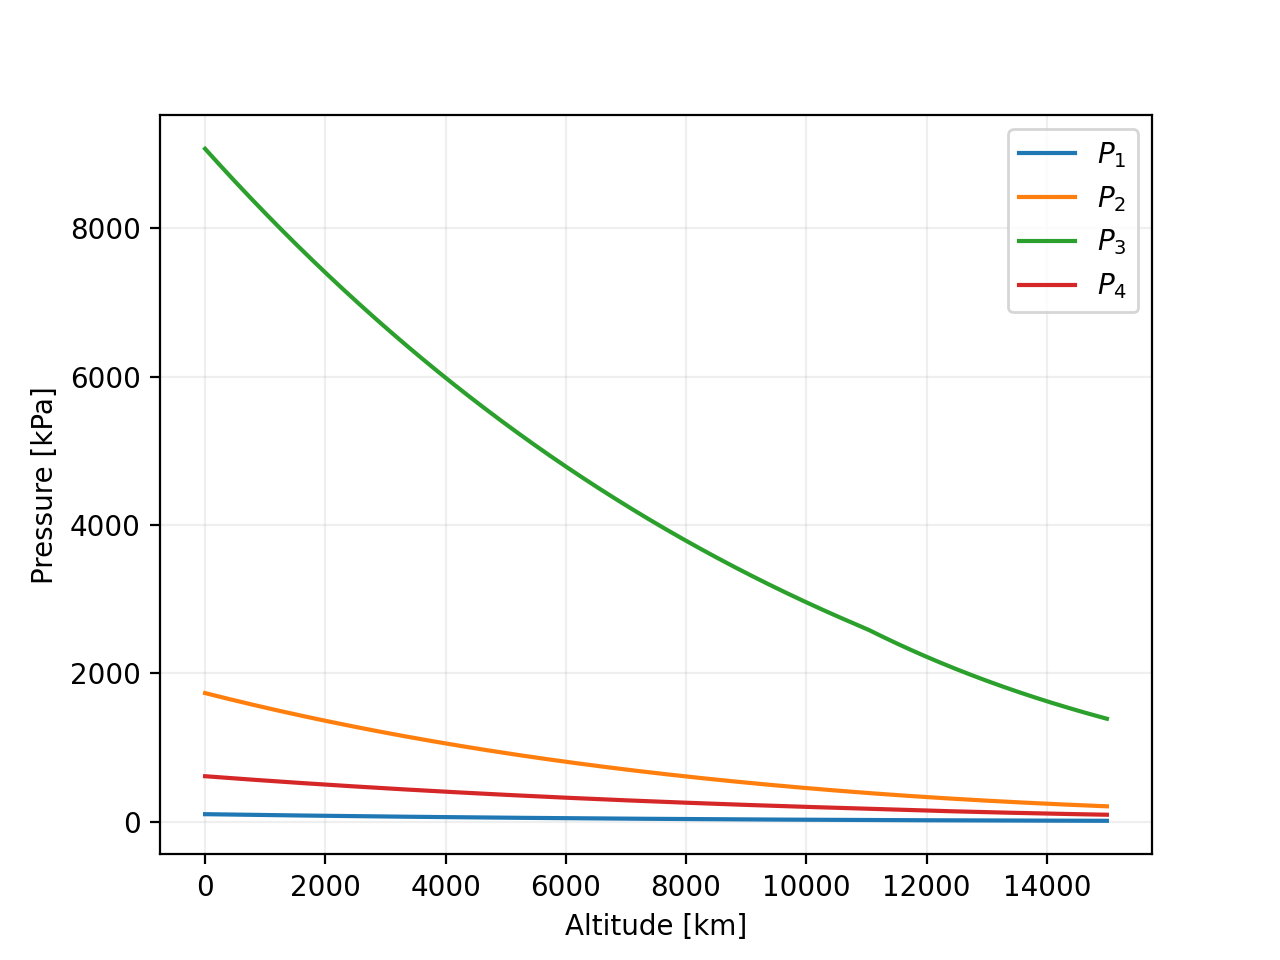

<IPython.core.display.Javascript object>


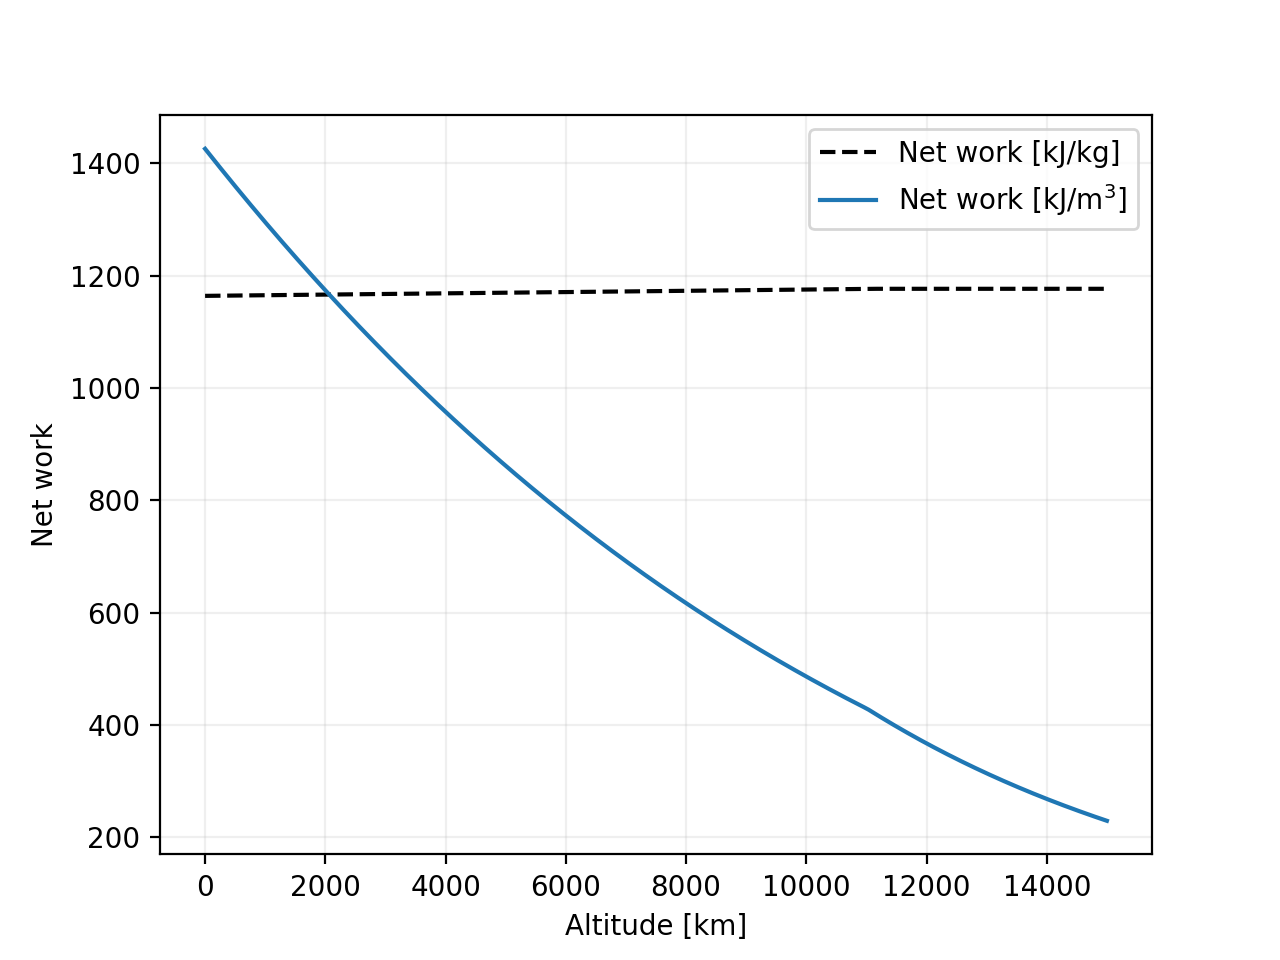

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
plt.xlabel('Altitude [km]')
plt.ylabel('Pressure [kPa]')
ax.plot(z,p1,label='$P_1$')
ax.plot(z,p2,label='$P_2$')
ax.plot(z,p3,label='$P_3$')
ax.plot(z,p4,label='$P_4$')
plt.legend()

fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
plt.xlabel('Altitude [km]')
plt.ylabel('Net work')
ax.plot(z,wnet,ls='--',c='k',label='Net work [kJ/kg]')
ax.plot(z,wvol,ls='-',label='Net work [kJ/m$^3$]')
plt.legend()
plt.show();